<a href="https://colab.research.google.com/github/EliraAkimbaeva/Chemical_Solubility/blob/main/Solubility_of_molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the project**
1.   Machine Learning type: Supervised
2.   Type(s) of models: Linear Regression, Random Forest



Import libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load the data

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## About the data

In [4]:
df.columns

Index(['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS'], dtype='object')

In [5]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [6]:
df.tail()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790
1143,2.02164,179.219,1.0,0.461538,-2.581


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [8]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [9]:
df.shape

(1144, 5)

In [10]:
df.loc[0]

MolLogP                 2.5954
MolWt                 167.8500
NumRotatableBonds       0.0000
AromaticProportion      0.0000
logS                   -2.1800
Name: 0, dtype: float64

In [11]:
df.loc[1143]

MolLogP                 2.021640
MolWt                 179.219000
NumRotatableBonds       1.000000
AromaticProportion      0.461538
logS                   -2.581000
Name: 1143, dtype: float64

In [12]:
df.loc[[0]]

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.85,0.0,0.0,-2.18


In [13]:
df.loc[[1143]]

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1143,2.02164,179.219,1.0,0.461538,-2.581


In [ ]:
df.to_string()

## Data Preprocessing

In [15]:
df.isnull().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [16]:
df['MolLogP'].value_counts()

7.27400    7
1.41490    7
5.31380    6
1.94750    6
1.97250    5
          ..
2.29860    1
1.24510    1
1.36870    1
3.29690    1
2.02164    1
Name: MolLogP, Length: 930, dtype: int64

In [17]:
df.drop('MolLogP',axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolWt               1144 non-null   float64
 1   NumRotatableBonds   1144 non-null   float64
 2   AromaticProportion  1144 non-null   float64
 3   logS                1144 non-null   float64
dtypes: float64(4)
memory usage: 35.9 KB


In [19]:
df['MolWt'].unique()

array([167.85 , 133.405, 187.375,  98.96 ,  96.944, 118.176, 215.894,
       132.206, 181.449, 120.195, 393.698, 134.222, 314.802, 110.112,
       235.906, 187.862, 147.004, 112.987, 170.92 , 168.108,  58.08 ,
       120.195, 213.105,  54.092, 147.004, 132.232, 114.094, 156.228,
        80.13 , 147.004, 156.228,  68.119,  82.146, 180.21 , 154.253,
       302.458, 194.237, 137.02 , 179.101, 165.074, 207.07 , 193.128,
       151.047, 122.993,  74.123,  56.108, 143.411,  92.569, 134.65 ,
       120.623, 162.619, 106.596,  78.542, 158.285, 140.27 , 186.339,
       116.204,  98.189,  96.173, 242.447, 102.177,  84.162, 100.161,
       184.02 , 226.101, 254.07 , 169.993,  96.173, 180.25 , 142.201,
       192.261, 126.115, 144.173, 143.189, 173.171,  89.094, 144.258,
       126.243, 124.227, 270.501, 130.231, 112.216, 110.2  , 228.42 ,
        88.15 ,  70.135,  68.119, 122.167,  60.096, 214.393, 498.662,
       429.772, 360.882, 291.992, 395.327, 326.437, 291.992, 100.205,
       114.232, 128.

In [20]:
value_counts = df['NumRotatableBonds'].apply(lambda x: '0' if x == 0 else 'more than 0').value_counts()

value_counts

more than 0    782
0              362
Name: NumRotatableBonds, dtype: int64

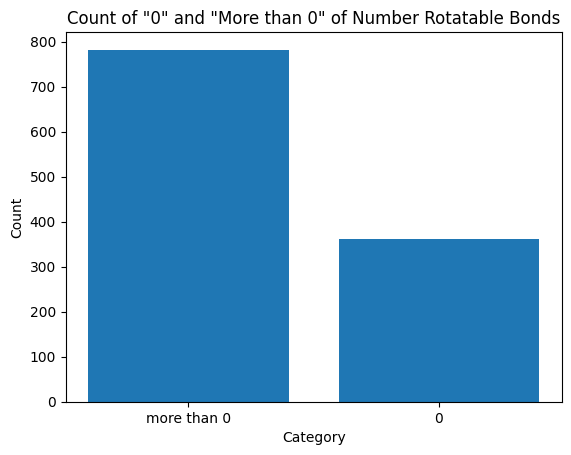

In [21]:
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of "0" and "More than 0" of Number Rotatable Bonds')

# Display the chart
plt.show()

## Data cleaning

for empty cells

In [22]:
df.dropna(inplace = True)

print(df.to_string())

        MolWt  NumRotatableBonds  AromaticProportion    logS
0     167.850                0.0            0.000000  -2.180
1     133.405                0.0            0.000000  -2.000
2     167.850                1.0            0.000000  -1.740
3     133.405                1.0            0.000000  -1.480
4     187.375                1.0            0.000000  -3.040
5      98.960                0.0            0.000000  -1.290
6      96.944                0.0            0.000000  -1.640
7     118.176                4.0            0.000000  -0.430
8     215.894                0.0            0.600000  -4.570
9     132.206                0.0            0.600000  -4.370
10    215.894                0.0            0.600000  -4.630
11    181.449                0.0            0.666667  -4.000
12    120.195                0.0            0.666667  -3.200
13    393.698                0.0            0.600000  -6.980
14    215.894                0.0            0.600000  -5.560
15    134.222           

for wrong format

In [23]:
df['logS'] = pd.to_datetime(df['logS'])

print(df.to_string())

        MolWt  NumRotatableBonds  AromaticProportion                          logS
0     167.850                0.0            0.000000 1969-12-31 23:59:59.999999998
1     133.405                0.0            0.000000 1969-12-31 23:59:59.999999998
2     167.850                1.0            0.000000 1969-12-31 23:59:59.999999999
3     133.405                1.0            0.000000 1969-12-31 23:59:59.999999999
4     187.375                1.0            0.000000 1969-12-31 23:59:59.999999997
5      98.960                0.0            0.000000 1969-12-31 23:59:59.999999999
6      96.944                0.0            0.000000 1969-12-31 23:59:59.999999999
7     118.176                4.0            0.000000 1970-01-01 00:00:00.000000000
8     215.894                0.0            0.600000 1969-12-31 23:59:59.999999996
9     132.206                0.0            0.600000 1969-12-31 23:59:59.999999996
10    215.894                0.0            0.600000 1969-12-31 23:59:59.999999996
11  

for wrong data

In [24]:
df.loc[0,'logS'] = -2.18

print(df.to_string())

        MolWt  NumRotatableBonds  AromaticProportion                           logS
0     167.850                0.0            0.000000                          -2.18
1     133.405                0.0            0.000000  1969-12-31 23:59:59.999999998
2     167.850                1.0            0.000000  1969-12-31 23:59:59.999999999
3     133.405                1.0            0.000000  1969-12-31 23:59:59.999999999
4     187.375                1.0            0.000000  1969-12-31 23:59:59.999999997
5      98.960                0.0            0.000000  1969-12-31 23:59:59.999999999
6      96.944                0.0            0.000000  1969-12-31 23:59:59.999999999
7     118.176                4.0            0.000000            1970-01-01 00:00:00
8     215.894                0.0            0.600000  1969-12-31 23:59:59.999999996
9     132.206                0.0            0.600000  1969-12-31 23:59:59.999999996
10    215.894                0.0            0.600000  1969-12-31 23:59:59.99

for duplicates

In [25]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1139    False
1140    False
1141    False
1142    False
1143    False
Length: 1144, dtype: bool

## EDA

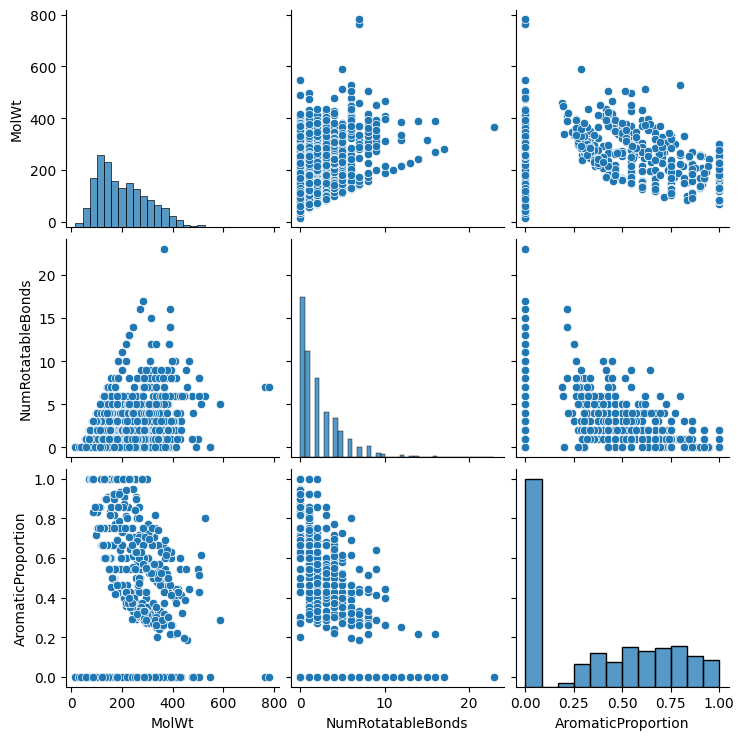

In [26]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-27-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

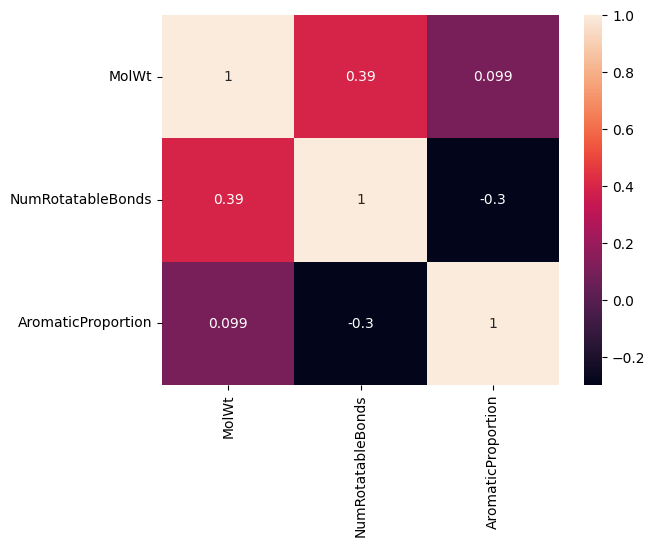

In [27]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

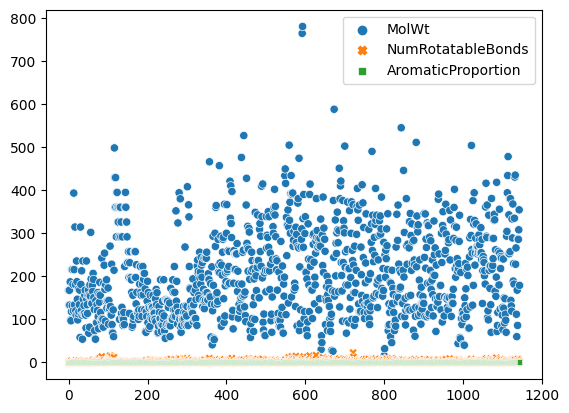

In [28]:
sns.scatterplot(df)

## **Data preparation**

data separation as x and y

In [29]:
y = df["logS"]
y

0                               -2.18
1       1969-12-31 23:59:59.999999998
2       1969-12-31 23:59:59.999999999
3       1969-12-31 23:59:59.999999999
4       1969-12-31 23:59:59.999999997
                    ...              
1139    1970-01-01 00:00:00.000000001
1140    1969-12-31 23:59:59.999999996
1141    1969-12-31 23:59:59.999999997
1142    1969-12-31 23:59:59.999999997
1143    1969-12-31 23:59:59.999999998
Name: logS, Length: 1144, dtype: object

In [30]:
x = df.drop("logS", axis=1)
x

,MolWt,NumRotatableBonds,AromaticProportion
0,167.850,0.0,0.000000
1,133.405,0.0,0.000000
2,167.850,1.0,0.000000
3,133.405,1.0,0.000000
4,187.375,1.0,0.000000
...,...,...,...
1139,287.343,8.0,0.000000
1140,286.114,2.0,0.333333
1141,308.333,4.0,0.695652
1142,354.815,3.0,0.521739


## **Data splitting**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)



In [32]:
X_train

,MolWt,NumRotatableBonds,AromaticProportion
107,112.216,5.0,0.000000
378,142.070,0.0,0.000000
529,168.152,0.0,0.000000
546,154.125,0.0,0.000000
320,100.161,2.0,0.000000
...,...,...,...
802,250.301,1.0,0.842105
53,82.146,3.0,0.000000
350,256.348,0.0,0.900000
79,186.339,10.0,0.000000


In [33]:
X_test

,MolWt,NumRotatableBonds,AromaticProportion
822,172.268,7.0,0.000000
118,360.882,1.0,0.666667
347,145.161,0.0,0.909091
1123,119.378,0.0,0.000000
924,108.140,0.0,0.750000
...,...,...,...
1114,478.513,4.0,0.000000
427,276.338,0.0,1.000000
711,218.205,5.0,0.000000
4,187.375,1.0,0.000000


In [34]:
y_train

107    1969-12-31 23:59:59.999999996
378    1969-12-31 23:59:59.999999999
529    1969-12-31 23:59:59.999999999
546    1969-12-31 23:59:59.999999999
320              1970-01-01 00:00:00
                   ...              
802    1969-12-31 23:59:59.999999998
53     1969-12-31 23:59:59.999999998
350    1969-12-31 23:59:59.999999993
79     1969-12-31 23:59:59.999999996
792    1969-12-31 23:59:59.999999997
Name: logS, Length: 915, dtype: object

In [35]:
y_test

822     1969-12-31 23:59:59.999999997
118     1969-12-31 23:59:59.999999992
347     1969-12-31 23:59:59.999999998
1123    1969-12-31 23:59:59.999999999
924               1970-01-01 00:00:00
                    ...              
1114    1969-12-31 23:59:59.999999996
427     1969-12-31 23:59:59.999999991
711               1970-01-01 00:00:00
4       1969-12-31 23:59:59.999999997
948     1969-12-31 23:59:59.999999998
Name: logS, Length: 229, dtype: object

## **Model Building**

**Linear Regression**

Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Applying the model to make a prediction

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("LR MSE (train):" , lr_train_mse)
print("LR R2 (test):" , lr_train_r2)
print("LR MSE (train):" , lr_test_mse)
print("LR R2 (test):" , lr_test_r2)


In [ ]:
lr_results = pd.DataFrame(['LinearRegression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

**Random** **forest**

Training the model

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest' , rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

## **Data Visualization of prediction results**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#0f0f0f' , alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')